<a href="https://colab.research.google.com/github/akshita18r/bajaj-stock-prediction/blob/main/bajaj_stockPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
df= pd.read_csv('/content/drive/MyDrive/Copy of Bajaj Stock Dataset.csv')

In [4]:
df_copy= df.copy()

In [5]:
df_copy.dropna(inplace= True)
df_copy.columns= df_copy.columns.str.strip()

In [ ]:
# print(df_copy['Date'].duplicated().sum())  # Shows the number of duplicates


0


In [6]:
print(df_copy.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [7]:
df_copy.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-07-01,5.239737,5.540927,5.239737,5.412679,3.950042,21923.0
1,2002-07-02,5.523439,5.537041,5.421423,5.443769,3.972731,61044.0
2,2002-07-03,5.505950,5.545785,5.328151,5.466116,3.989039,34160.0
3,2002-07-04,5.501093,5.572018,5.417537,5.528297,4.034419,27892.0
4,2002-07-05,5.563274,5.656546,5.474860,5.590478,4.079795,58976.0


In [ ]:
# df_copy['Date'] = df_copy['Date'].str.replace('/', '-')  # Convert '/' to '-'
# df_copy['Date'] = pd.to_datetime(df_copy['Date'], errors='coerce')

In [ ]:
# df_copy['Date'] = pd.to_datetime(df_copy['Date'], format="%Y-%m-%d", errors='coerce')


In [8]:
# df_copy = df_copy[df_copy.index.notna()]  # Remove rows where Date (index) is NaT (invalid date)
df1= df_copy.reset_index()['Adj Close']

In [9]:
df1

,Adj Close
0,3.950042
1,3.972731
2,3.989039
3,4.034419
4,4.079795
...,...
5476,6607.149902
5477,6647.750000
5478,6789.750000
5479,6812.450195


# Scaling

In [43]:
scaler = MinMaxScaler(feature_range=(0, 1))
df1_scaled = scaler.fit_transform(df1.reshape(-1, 1))

# Train Test Split

In [64]:
training_size = int(len(df1_scaled) * 0.65)
test_size = len(df1_scaled) - training_size
train_data, test_data = df1_scaled[0:training_size, :], df1_scaled[training_size:len(df1_scaled), :1]



In [65]:
training_size,test_size

(3562, 1919)

# Creating timesteps

In [46]:
def create_dataset(dataset, time_step=100):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [47]:
#reshapeing
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [48]:
print(X_train.shape), print(y_train.shape)

(3461, 100)
(3461,)


(None, None)

In [33]:
print(X_test.shape), print(y_test.shape)

(1818, 100)
(1818,)


(None, None)

# LSTM Model

In [66]:
#reshaping into 3D
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [50]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from keras.optimizers import Adam

In [67]:
from keras.layers import Dropout

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=0.001))





/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [68]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_4 (LSTM)                        │ (None, 100, 50)             │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 100, 50)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_5 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

In [53]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=1)


Epoch 1/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 18s 129ms/step - loss: 1.5968e-04 - val_loss: 0.0031
Epoch 2/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 21s 130ms/step - loss: 1.4299e-05 - val_loss: 0.0041
Epoch 3/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 19s 119ms/step - loss: 1.2720e-05 - val_loss: 0.0029
Epoch 4/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 20s 117ms/step - loss: 9.4256e-06 - val_loss: 0.0060
Epoch 5/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 21s 120ms/step - loss: 1.3743e-05 - val_loss: 0.0058
Epoch 6/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 20s 112ms/step - loss: 1.0650e-05 - val_loss: 0.0086
Epoch 7/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 12s 109ms/step - loss: 9.6890e-06 - val_loss: 0.0014
Epoch 8/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 12s 112ms/step - loss: 9.9145e-06 - val_loss: 0.0032
Epoch 9/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 23s 134ms/step - loss: 9.3739e-06 - val_loss: 0.0012
Epoch 10/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 20s 127ms/step - loss: 1.0347e-05 - val_loss: 0.0071
Epoch 11/100
109/109 ━━━━━━━━━━━━━━━━━━━━ 21s 136ms/step - 

# Prediction

In [54]:
import tensorflow as tf

In [55]:
train_predict= model.predict(X_train)
test_predict= model.predict(X_test)

109/109 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step
57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


In [69]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [70]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
y_train_inv = scaler.inverse_transform(y_train)
y_test_inv = scaler.inverse_transform(y_test)

In [71]:
#Calculate RSME performance
from sklearn.metrics import mean_squared_error
import math


In [72]:
train_rmse = math.sqrt(mean_squared_error(y_train_inv, train_predict))
test_rmse = math.sqrt(mean_squared_error(y_test_inv, test_predict))

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)

Train RMSE: 0.0011108230146767723
Test RMSE: 0.06156151448985477


In [73]:
# Shift train predictions for plotting
look_back = time_step
trainPredictPlot = np.empty_like(df1_scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

testPredictPlot = np.empty_like(df1_scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1_scaled)-1, :] = test_predict



# Data Visualization

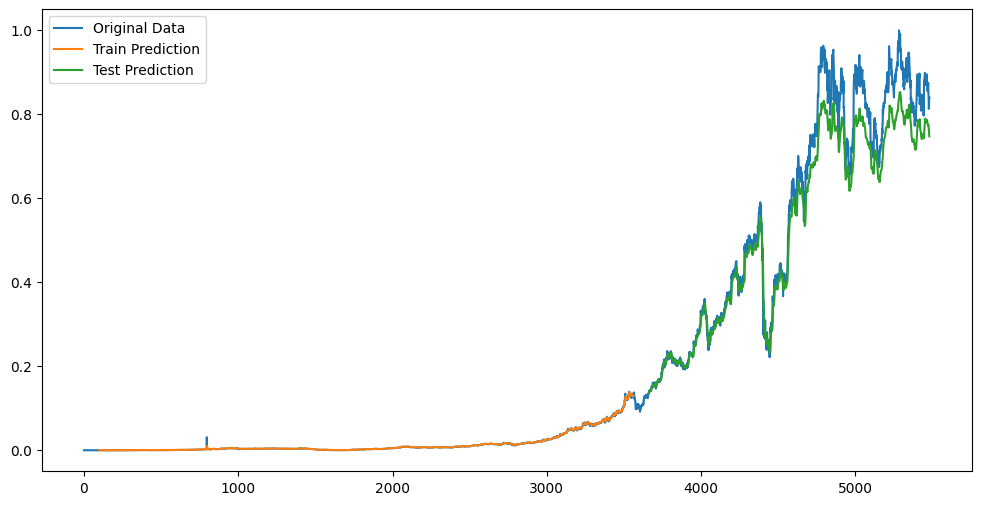

In [74]:
#(Line Plot) Visualize how the stock price (Adj Close) changes over time.
plt.figure(figsize=(12,6))
plt.plot(scaler.inverse_transform(df1_scaled), label='Original Data')
plt.plot(trainPredictPlot, label='Train Prediction')
plt.plot(testPredictPlot, label='Test Prediction')
plt.legend()
plt.show()



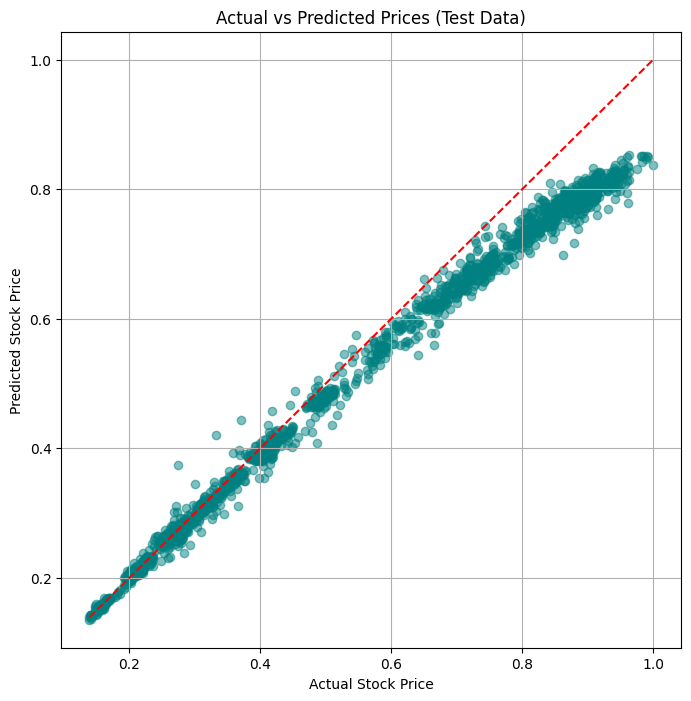

In [76]:
plt.figure(figsize=(8,8))
plt.scatter(y_test_inv, test_predict, color='teal', alpha=0.5)
plt.xlabel('Actual Stock Price')
plt.ylabel('Predicted Stock Price')
plt.title('Actual vs Predicted Prices (Test Data)')
plt.plot([y_test_inv.min(), y_test_inv.max()], [y_test_inv.min(), y_test_inv.max()], 'r--')  # Line for perfect prediction
plt.grid()
plt.show()


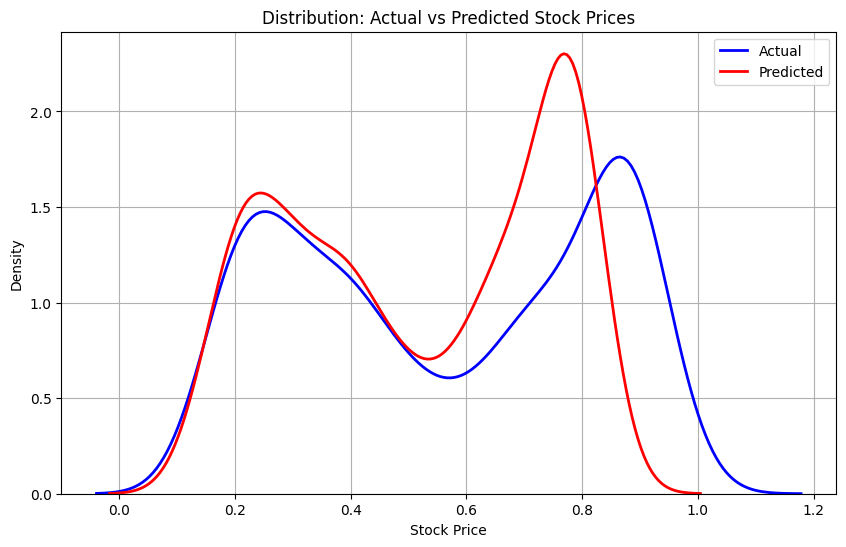

In [81]:
#Visualize the predicted stock prices versus the actual prices from the test data.
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.kdeplot(y_test_inv.flatten(), label='Actual', color='blue', linewidth=2)
sns.kdeplot(test_predict.flatten(), label='Predicted', color='red', linewidth=2)

plt.title('Distribution: Actual vs Predicted Stock Prices')
plt.xlabel('Stock Price')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()
